# 1. 라이브러리 세팅

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 맷플롯립 한글 설정 
# matplotlib Korean font
plt.rc('font', family='Malgun Gothic')

In [13]:
# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

# 컬럼의 너비 제한 해제
pd.set_option('display.max_colwidth', None)

# 출력할 행의 수를 설정 (필요에 따라 조정)
pd.set_option('display.max_rows', 1000)


# 2. 데이터 정리

## 2.1. 데이터 로드

In [14]:
# csv 데이터 불러오기
sanga = pd.read_csv('00data/5.세종시_상가개폐업정보.csv')
building_reg = pd.read_csv('00data/6.세종시_건축물대장_표제부.csv')
building_floor = pd.read_csv('00data/7.세종시_건축물대장_층별개요.csv')

In [25]:
# 지도 데이터 불러오고 좌표 설정

# 행정구역 경계 데이터 경로
sejong_path = "00data/세종특별자치시/36000"

data_path_sgg = sejong_path + "/TL_SCCO_SIG.shp"
data_path_emd = sejong_path + "/TL_SCCO_EMD.shp"
data_path_li = sejong_path + "/TL_SCCO_LI.shp"
data_path_build = sejong_path + "/TL_SPBD_BULD.shp"
data_path_rw = sejong_path + "/TL_SPRD_RW.shp"

# Shapefile 데이터 불러오기
building = gpd.read_file(data_path_build, encoding='euc-kr')
rw_poly = gpd.read_file(data_path_rw, encoding='euc-kr')
sejong_zone_adm = gpd.read_file('00data/11.세종시_대상구역도.geojson')
# 100x100 격자 데이터
area_grid = gpd.read_file('00data/4.세종시_격자(매핑용).geojson')

# 좌표계 설정
building = building.set_crs('EPSG:5179')
rw_poly = rw_poly.set_crs('EPSG:5179')

# 좌표계 변환
building_4326 = building.to_crs(epsg=4326)
rw_poly_4326 = rw_poly.to_crs(epsg=4326)

## 2.2. 지도 전처리

In [28]:
# 대상구역계 바운더리 추출
sejong_zone_adm_boundary = sejong_zone_adm.boundary

# 대상구역계 안에 있는 정보만 클리핑 및 추출
rw_poly_clipped = gpd.overlay(rw_poly_4326, sejong_zone_adm, how='intersection')
building_clipped = gpd.sjoin(building_4326, sejong_zone_adm, how='inner', predicate='within')

# 겹치는 부분만 남기고 필터링
area_grid_intsc = gpd.overlay(area_grid, sejong_zone_adm, how='intersection')

TypeError: `keep_geom_type` does not support GeometryCollection.

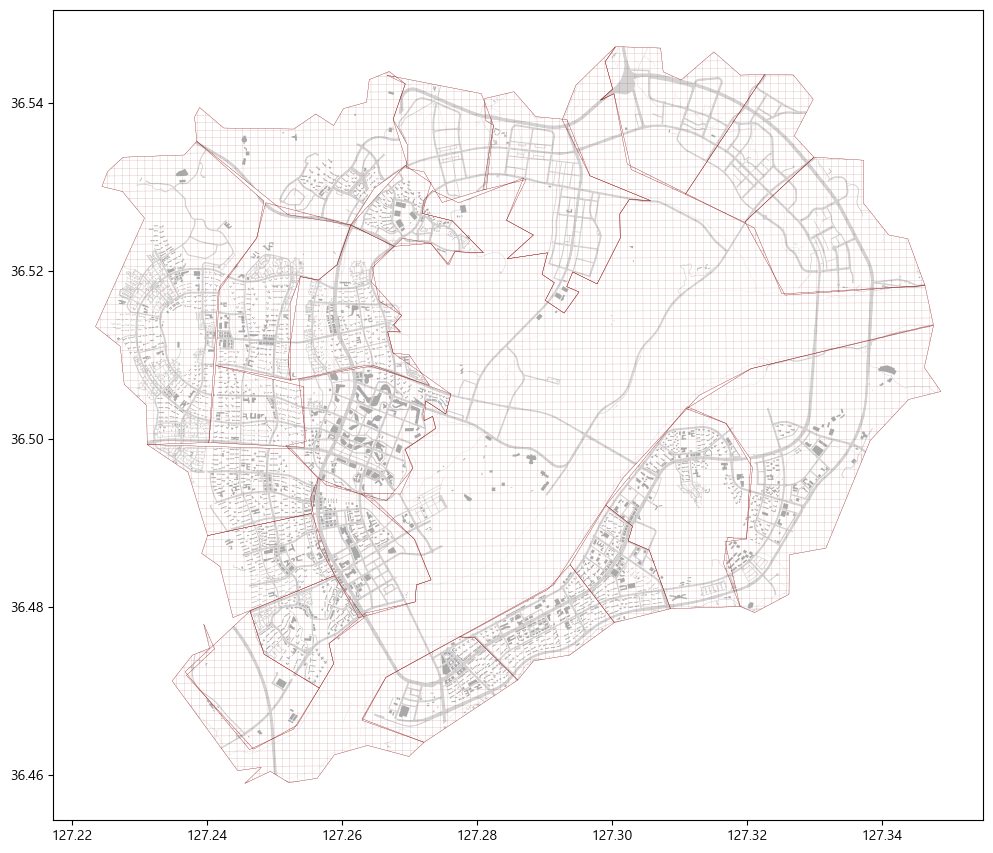

In [24]:
# 시각화
fig, ax = plt.subplots(figsize=(12, 12))

# 도로 데이터
rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
# 건물 데이터
building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
# 세종시 경계(기존 읍면동 단위)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='DarkRed', linewidth=0.2, zorder=3)
# 격자 데이터
area_grid_intsc.plot(ax=ax, facecolor='none', edgecolor='darkred', linewidth=0.1, linestyle='--', alpha=0.5)

plt.show()

## 2.3. 건축물 대장 전처리

In [ ]:
# 6.세종시_건축물대장_표제부
# 데이터 드랍
building_reg.drop(['splot_nm', 'block', 'lot', 'bylot_cnt',
                  'strct_cd', 'strct_cd_nm', 'etc_strct',
                  'roof_cd', 'roof_cd_nm', 'etc_roof',
                  'na_ugrnd_cd', 'fmly_cnt',
                  'engr_grade', 'engr_rat', 'engr_epi',
                  'gn_bld_grade', 'gn_bld_cert', 'itg_bld_grade',
                  'itg_bld_cert', 'rserthqk_dsgn_apply_yn',
                  'rserthqk_ablty','main_atch_gb_cd_nm', 'main_atch_gb_cd',
                  'mgm_bldrgst_pk', 'regstr_gb_cd','regstr_kind_cd',
                  'main_purps_cd', 'atch_bld_cnt', 'pmsno_kik_cd',
                    'pmsno_gb_cd','pmsno_kik_cd_nm', 'pmsno_gb_cd_nm',
                    'regstr_kind_nm', 'na_main_bun', 'na_sub_bun',
                    'pms_day', 'stcns_day', 'pmsno_year', 'crtn_day',
                    'bun', 'ji'],axis=1, inplace=True)
building_reg.head(3)

,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm,etc_purps,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU
0,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,618동,0.0,396.12,0.0,2843.03,2843.03,0.0,공동주택,공동주택(아파트),31,34.25,11,1,0,1,0.0,2843.03,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000
1,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,603동,0.0,398.21,0.0,4449.60,4449.60,0.0,공동주택,공동주택(아파트),49,57.35,18,1,0,1,0.0,4449.60,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000
2,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,613동,0.0,445.21,0.0,5525.34,5525.34,0.0,공동주택,공동주택(아파트),58,58.94,20,1,0,2,0.0,5525.34,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000


In [ ]:
# 주소지 전처리
building_reg[['plat_plc', 'new_plat_plc', 'bld_nm']] = building_reg[['plat_plc', 'new_plat_plc', 'bld_nm']].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))
building_reg[['plat_plc', 'new_plat_plc', 'bld_nm']] = building_reg[['plat_plc', 'new_plat_plc', 'bld_nm']].apply(lambda x: x.str.strip())
building_reg[['plat_plc', 'new_plat_plc', 'bld_nm']].head(3)

,plat_plc,new_plat_plc,bld_nm
0,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지
1,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지
2,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지


In [ ]:
# 구역계 읍면동 자료로만 구성
building_reg_main = building_reg[(building_reg.emd_cd ==10100)|
                                     (building_reg.emd_cd ==10200)|
                                     (building_reg.emd_cd ==10300)|
                                     (building_reg.emd_cd ==10400)|
                                     (building_reg.emd_cd ==10500)|
                                     (building_reg.emd_cd ==10600)|
                                     (building_reg.emd_cd ==10700)|
                                     (building_reg.emd_cd ==10800)|
                                     (building_reg.emd_cd ==10900)|
                                     (building_reg.emd_cd ==11000)|
                                     (building_reg.emd_cd ==11100)|
                                     (building_reg.emd_cd ==11200)|
                                     (building_reg.emd_cd ==11300)|
                                     (building_reg.emd_cd ==11400)|
                                     (building_reg.emd_cd ==11500)|
                                     (building_reg.emd_cd ==11600)|
                                     (building_reg.emd_cd ==11700)|
                                     (building_reg.emd_cd ==11800)|
                                     (building_reg.emd_cd ==11900)|
                                     (building_reg.emd_cd ==12000)|
                                     (building_reg.emd_cd ==12100)|
                                     (building_reg.emd_cd ==12200)|
                                     (building_reg.emd_cd ==12300)]
print(building_reg_main.shape)
building_reg_main.head(3)

(5910, 37)


,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm,etc_purps,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU
0,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,618동,0.0,396.12,0.0,2843.03,2843.03,0.0,공동주택,공동주택(아파트),31,34.25,11,1,0,1,0.0,2843.03,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000
1,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,603동,0.0,398.21,0.0,4449.60,4449.60,0.0,공동주택,공동주택(아파트),49,57.35,18,1,0,1,0.0,4449.60,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000
2,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 598,수루배마을 6단지,3.611023e+11,10101.0,613동,0.0,445.21,0.0,5525.34,5525.34,0.0,공동주택,공동주택(아파트),58,58.94,20,1,0,2,0.0,5525.34,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,0,3611010100110350000


In [ ]:
# 주용도 전처리
building_reg.main_purps_cd_nm.unique()

array(['공동주택', '제2종근린생활시설', '노유자시설', '교육연구시설', '단독주택', '위험물저장및처리시설',
       '제1종근린생활시설', '업무시설', '의료시설', '종교시설', '운동시설', '문화및집회시설', '자원순환관련시설',
       '자동차관련시설', '수련시설', '판매시설', '발전시설', '분뇨.쓰레기처리시설', '관광휴게시설', '숙박시설',
       '묘지관련시설', '방송통신시설', '창고시설', '장례시설', '공장', '동물및식물관련시설', '운수시설',
       '위락시설', '국방,군사시설', '교육연구및복지시설', '교정및군사시설', nan, '근린생활시설', '가설건축물',
       '야영장시설'], dtype=object)

In [ ]:
# 주용도 추출
building_reg_main = building_reg_main[(building_reg_main['main_purps_cd_nm'] == '제2종근린생활시설')|
                              (building_reg_main['main_purps_cd_nm'] == '제1종근린생활시설')|
                                (building_reg_main['main_purps_cd_nm'] == '숙박시설')| 
                                (building_reg_main['main_purps_cd_nm'] == '업무시설')|    
                             (building_reg_main['main_purps_cd_nm'] == '판매시설')|
                             (building_reg_main['main_purps_cd_nm'] == '근린생활시설')]  
print(building_reg_main.shape)
building_reg_main.head(3)

(908, 37)


,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm,etc_purps,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU
38,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-1,0.0,400.12,0.00,114.68,114.68,0.00,제2종근린생활시설,근린생활시설-1,0,4.5,1,0,0,0,0.0,114.68,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,2,3611010100110350000
40,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-2,0.0,218.29,0.00,231.24,231.24,0.00,제2종근린생활시설,근린생활시설-2,0,4.5,1,0,0,0,0.0,231.24,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,5,3611010100110350000
66,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000


In [ ]:
# # 결측치 주소지 다시 붙이기
# addr_list = pd.read_csv('00data/addr_list.csv')
# # addr_list의 주소지에 해당하는 building_reg의 행을 찾기
# building_reg_addr = building_reg[building_reg['new_plat_plc'].isin(addr_list['0'])]
# print(building_reg_addr.shape)

# # 드랍된 주소지 다시 붙이기 
# building_reg_main = pd.concat([building_reg_main, building_reg_addr], axis=0)
# building_reg_main.shape

In [ ]:
building_reg_main.main_purps_cd_nm.unique()

array(['제2종근린생활시설', '제1종근린생활시설', '업무시설', '판매시설', '숙박시설'], dtype=object)

## 2.4. 건축물대장_층별 전처리

In [ ]:
print(building_floor.shape)
building_floor.describe()

(40000, 14)


,emd_cd,na_road_cd,flr_num,area_sqm,area_excl_yn,PNU
count,40000.00000,3.992400e+04,40000.000000,40000.000000,39575.000000,4.000000e+04
mean,10808.32750,3.611033e+11,8.967450,538.677563,0.008768,3.611011e+18
std,404.51019,5.107599e+05,7.858294,1773.710549,0.093228,4.045132e+11
min,10100.00000,3.611020e+11,0.000000,0.000000,0.000000,3.611010e+18
25%,10400.00000,3.611033e+11,2.000000,220.064800,0.000000,3.611010e+18
50%,10900.00000,3.611033e+11,7.000000,334.240400,0.000000,3.611011e+18
75%,11200.00000,3.611034e+11,14.000000,456.679675,0.000000,3.611011e+18
max,11400.00000,3.611049e+11,49.000000,62731.307000,1.000000,3.611011e+18


In [ ]:
# 안쓰는 항목 드랍
building_floor.drop(['sgg_cd', 'na_bjdong_cd', 'mgm_bldrgst_pk', 'splot_nm', 'bun', 'ji', 'na_main_bun',
                     'na_ugrnd_cd', 'flr_div_cd_nm', 'main_purps_cd', 'sub_atch_gb_cd',
                     'crtn_day', 'block', 'lot', 'strct_cd', 'strct_cd_nm',
                    'etc_strct', 'plat_gb_cd', 'na_sub_bun',
                    'flr_div_cd'], axis=1, inplace=True)
print(building_floor.shape)
building_floor.head(1)

KeyError: "['sgg_cd', 'na_bjdong_cd', 'mgm_bldrgst_pk', 'splot_nm', 'bun', 'ji', 'na_main_bun', 'na_ugrnd_cd', 'flr_div_cd_nm', 'main_purps_cd', 'sub_atch_gb_cd', 'crtn_day', 'block', 'lot', 'strct_cd', 'strct_cd_nm', 'etc_strct', 'plat_gb_cd', 'na_sub_bun', 'flr_div_cd'] not found in axis"

In [ ]:
# 주소지 전처리
building_floor[['plat_plc', 'new_plat_plc', 'bld_nm']] = building_floor[['plat_plc', 'new_plat_plc', 'bld_nm']].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))
building_floor[['plat_plc', 'new_plat_plc', 'bld_nm']] = building_floor[['plat_plc', 'new_plat_plc', 'bld_nm']].apply(lambda x: x.str.strip())
building_floor[['plat_plc', 'new_plat_plc', 'bld_nm']].head(3)

,plat_plc,new_plat_plc,bld_nm
0,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지
1,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지
2,세종특별자치시 반곡동 1035번지,세종특별자치시 시청대로 598,수루배마을 6단지


## 2.5. 상가개폐업 데이터

In [ ]:
# 데이터 크기 확인
print(sanga.shape)

(43974, 20)


1955-10-29 00:00:00
2024-05-31 00:00:00


<Axes: >

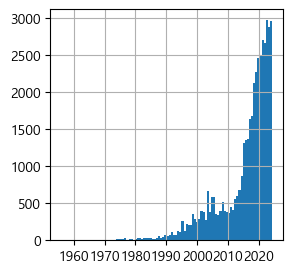

In [ ]:
# 상가개폐업 일자 정보 
sanga['lcpmt_dt'] = pd.to_datetime(sanga['lcpmt_dt'], errors='coerce')
print(sanga['lcpmt_dt'].min())
print(sanga['lcpmt_dt'].max())
# 개업 날짜 히스토그램
fig, ax = plt.subplots(figsize=(3, 3))
sanga['lcpmt_dt'].hist(ax=ax, bins=100)

In [ ]:
# 주소지 전처리
sanga[['addr', 'rd_addr', 'bplc_nm']] = sanga[['addr', 'rd_addr', 'bplc_nm']].apply(lambda x: x.str.replace(r'\s+', ' ', regex=True))
sanga[['addr', 'rd_addr', 'bplc_nm']] = sanga[['addr', 'rd_addr', 'bplc_nm']].apply(lambda x: x.str.strip())
sanga[['addr', 'rd_addr', 'bplc_nm']].head(3)

,addr,rd_addr,bplc_nm
0,세종특별자치시 전동면 청람리 21-1,세종특별자치시 전동면 운주산로 720-6,청수환경
1,세종특별자치시 조치원읍 죽림리 389 죽림푸르지오,세종특별자치시 조치원읍 죽림본로 33-6 104동 1304호 (죽림푸르지오),하랑 영농조합법인
2,세종특별자치시 소정면 대곡리 368-8,세종특별자치시 소정면 학수소사길 63,(주)금강피스코


In [ ]:
######### 임시
# sanga[sanga['rd_addr'].str.contains('다정남로 123', na=False)]
sanga[sanga['addr'].str.contains('수루배마을', na=False)]

,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr,rd_zip_cd,bplc_nm,biz_type,lon,lat
2050,건강기능식품일반판매업,2020-02-19,NaN,3,폐업,NaN,폐업,2022-08-30,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 시청대로 *** ***동 ****호 (반곡동 수루배마을 *단지),NaN,스카이유통,NaN,127.314220,36.500450
2080,건강기능식품일반판매업,2020-05-11,NaN,3,폐업,NaN,폐업,2021-11-22,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 시청대로 *** ***동 ***호 (반곡동 수루배마을 *단지),NaN,달콤한다락방,NaN,127.314220,36.500450
2138,건강기능식품일반판매업,2020-09-18,NaN,3,폐업,NaN,폐업,2021-11-26,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 시청대로 *** ***동 ***호 (반곡동 수루배마을 *단지),NaN,그소하,NaN,127.314220,36.500450
2240,건강기능식품일반판매업,2021-06-16,NaN,3,폐업,NaN,폐업,2024-01-03,NaN,NaN,NaN,6.60,339-007,세종특별자치시 반곡동 **-* 수루배마을*단지 근린생활시설,세종특별자치시 한누리대로 **** 수루배마을*단지 근린생활시설 B동 *층 B***호 (반곡동),NaN,S핏 점핑다이어트,NaN,127.306693,36.498828
2248,건강기능식품일반판매업,2021-07-09,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 반곡로 ** ***동 ***호 (반곡동 수루배마을 *단지),NaN,다잇오,NaN,127.308760,36.499660
2269,건강기능식품일반판매업,2021-08-26,NaN,3,폐업,NaN,폐업,2022-03-21,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을*단지,세종특별자치시 반곡로 ** ***동 ****호 (반곡동 수루배마을*단지),NaN,유어데이마켓,NaN,127.307183,36.498014
2298,건강기능식품일반판매업,2021-11-17,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,5.00,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지 근린생활시설,세종특별자치시 반곡로 ** 수루배마을 *단지 근린생활시설 ***동 *층 ***호 (반곡동),NaN,직구팜,NaN,127.307810,36.499174
2369,건강기능식품일반판매업,2022-03-28,NaN,3,폐업,NaN,폐업,2024-03-22,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 반곡로 ** ***동 ***호 (반곡동 수루배마을 *단지),NaN,보릿물상점,NaN,127.308760,36.499660
2402,건강기능식품일반판매업,2022-05-12,NaN,3,폐업,NaN,폐업,2024-03-11,NaN,NaN,NaN,20.26,339-007,세종특별자치시 반곡동 **-* 수루배마을*단지 상가동,세종특별자치시 한누리대로 **** 수루배마을*단지 상가동 ***동 *층 ***호 (반곡동),NaN,신한이앤에스 주식회사,NaN,127.317997,36.494312
2404,건강기능식품일반판매업,2022-05-19,NaN,3,폐업,NaN,폐업,2023-01-25,NaN,NaN,NaN,NaN,339-007,세종특별자치시 반곡동 **-* 수루배마을 *단지,세종특별자치시 반곡로 ** ***동 ****호 (반곡동 수루배마을 *단지),NaN,쇼핑로드,NaN,127.308760,36.499660


In [ ]:
# 대상구역계 안에 있는 상가들만 추출: 23268개
sejong_zone = gpd.read_file('00data/11.세종시_대상구역도.geojson') # 대상구역계
geo_sanga = gpd.GeoDataFrame(sanga, geometry=gpd.points_from_xy(sanga.lon, sanga.lat)) # 상가
zone_sanga = gpd.sjoin(geo_sanga, sejong_zone, how='inner', predicate='within') # 대상구역계 안에 있는 상가들만 추출
print(zone_sanga.shape)
zone_sanga.head(1)

(23268, 25)


,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr,rd_zip_cd,bplc_nm,biz_type,lon,lat,geometry,index_right,EMD_CD,COL_ADM_SE,EMD_NM
56,가축사육업,2004-11-05,NaN,4,취소/말소/만료/정지/중지,NaN,행정처분,NaN,NaN,NaN,NaN,0.0,339-863,세종특별자치시 연동면 합강리 ***-*번지,세종특별자치시 연동면 원합강*길 **,NaN,합강목장,NaN,127.332681,36.525324,POINT (127.33268 36.52532),16,36110117,36110,합강동


In [ ]:
# 집단 급식소 제외
print(zone_sanga.shape)
zone_sanga = zone_sanga[zone_sanga.service_nm != '집단급식소']
print(zone_sanga.shape)

(23268, 25)
(22912, 25)


In [ ]:
zone_sanga[zone_sanga.rd_addr.str.contains('세종특별자치시 한누리대로 1839', na=False)]

,service_nm,lcpmt_dt,rtrcn_dt,biz_stts_cd,biz_stts_nm,dtls_stts_cd,dtls_stts_nm,cls_date,tc_strt_dt,tc_end_dt,re_op_dt,plc_area,zip_cd,addr,rd_addr,rd_zip_cd,bplc_nm,biz_type,lon,lat,geometry,index_right,EMD_CD,COL_ADM_SE,EMD_NM
9295,미용업,2022-01-07,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,30.12,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가B동 지1층 B106호 (반곡동),NaN,오또헤어,일반미용업,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
9453,미용업,2023-03-10,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,33.10,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설 A107호,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가A동 1층 A107호 (반곡동),NaN,네일의 희망,네일아트업,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
22842,일반음식점,2020-08-28,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,30.24,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설 B104호,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가B동 1층 B104호 (반곡동),NaN,비비큐(BBQ) 반곡점,호프/통닭,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
22998,일반음식점,2020-12-03,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,34.09,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 A동 1층 110호 (반곡동),NaN,곱깨비 반곡점,식육(숯불구이),127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
23386,일반음식점,2021-07-16,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,58.71,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가B동 지1층 111호 (반곡동),NaN,맘스터치 반곡점,분식,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
23446,일반음식점,2021-08-18,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,31.56,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가A동 지1층 104호 (반곡동),NaN,피자파는집 시청반곡점,경양식,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
23572,일반음식점,2021-11-19,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,26.49,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가B동 1층 B101호 (반곡동),NaN,피자마루세종캠퍼스점,경양식,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
23574,일반음식점,2021-11-22,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,30.11,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가B동 지1층 B107호 (반곡동),NaN,진강정 세종시청점,호프/통닭,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동
23999,일반음식점,2022-08-22,NaN,1,영업/정상,NaN,영업,NaN,NaN,NaN,NaN,39.85,339-007,세종특별자치시 반곡동 42-1 수루배마을2단지 근린생활시설,세종특별자치시 한누리대로 1839 수루배마을2단지 근린생활시설 상가A동 1층 A103호 (반곡동),NaN,왕천파닭 반곡집현점,호프/통닭,127.310682,36.497253,POINT (127.31068 36.49725),0,36110101,36110,반곡동


# 3. 데이터 병합


In [ ]:
# 건축물 대장 필터링 파일 불러오기 
building_merged = pd.read_csv('00data/20.세종시_건축물대장_필터링_통합.csv')
building_merged

,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
0,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-1,0.0,400.1200,0.00,114.6800,114.6800,0.00,제2종근린생활시설,근린생활시설-1,0,4.50,1,0,0,0,0.0000,114.6800,0,0.0,0,0.0,0,0.00,0,0.00,20190607.0,2,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-1,114.6800,주건축물,0.0
1,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-2,0.0,218.2900,0.00,231.2400,231.2400,0.00,제2종근린생활시설,근린생활시설-2,0,4.50,1,0,0,0,0.0000,231.2400,0,0.0,0,0.0,0,0.00,0,0.00,20190607.0,5,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-2,231.2400,주건축물,0.0
2,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.4000,69.65,10875.9000,6437.7300,394.23,제2종근린생활시설,제2종근린생활시설,0,25.90,6,3,2,0,0.0000,10875.9000,0,0.0,0,0.0,84,3676.80,0,0.00,20180830.0,0,3611010100108390000,1,1층,소매점,소매점(주차로),0.0000,주건축물,0.0
3,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.4000,69.65,10875.9000,6437.7300,394.23,제2종근린생활시설,제2종근린생활시설,0,25.90,6,3,2,0,0.0000,10875.9000,0,0.0,0,0.0,84,3676.80,0,0.00,20180830.0,0,3611010100108390000,1,지1층,사무소,주차장,0.0000,주건축물,0.0
4,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.4000,69.65,10875.9000,6437.7300,394.23,제2종근린생활시설,제2종근린생활시설,0,25.90,6,3,2,0,0.0000,10875.9000,0,0.0,0,0.0,84,3676.80,0,0.00,20180830.0,0,3611010100108390000,2,지2층,사무소,주차장,0.0000,주건축물,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,세종특별자치시 도담동 645번지,36110,11400,0,일반,세종특별자치시 보람로 77,복합커뮤니티센터,3.611033e+11,11401.0,씨동,11158.0,199.8900,1.79,194.3000,194.3000,1.74,제1종근린생활시설,알파룸,0,4.95,1,0,0,0,0.0000,194.3000,0,0.0,0,0.0,56,1547.38,22,598.82,20140129.0,0,3611011400106450000,1,1층,공공도서관,알파룸,0.0000,주건축물,0.0
4197,세종특별자치시 도담동 651번지,36110,11400,0,집합,세종특별자치시 보듬4로 19,도램마을 12단지,3.611033e+11,11401.0,1208동,0.0,216.0000,0.00,216.0000,216.0000,0.00,제2종근린생활시설,근린생활시설,0,4.60,1,0,0,0,0.0000,216.0000,0,0.0,0,0.0,0,0.00,0,0.00,20140926.0,5,3611011400106510000,1,1층,기타제2종근린생활시설,근린생활시설,216.0000,주건축물,0.0
4198,세종특별자치시 도담동 653번지,36110,11400,0,집합,세종특별자치시 보듬4로 9,도램마을 11단지,3.611033e+11,11401.0,카림 애비뉴2,0.0,0.0000,0.00,93.4894,93.4894,0.00,판매시설,판매시설(상점),0,0.00,1,0,0,0,28322.4649,93.4894,0,0.0,0,0.0,0,0.00,0,0.00,20170321.0,2,3611011400106530000,1,1층,상점(소매점),판매시설(상점),93.4894,주건축물,0.0
4199,세종특별자치시 도담동 653번지,36110,11400,0,집합,세종특별자치시 보듬4로 9,도램마을 11단지,3.611033e+11,11401.0,카림 애비뉴3,0.0,0.0000,0.00,56.2100,56.2100,0.00,판매시설,판매시설(상점),0,0.00,1,0,0,0,28322.4649,56.2100,0,0.0,0,0.0,0,0.00,0,0.00,20170321.0,2,3611011400106530000,1,1층,상점(소매점),판매시설(상점),56.2100,주건축물,0.0


In [ ]:
building_merged[building_merged.new_plat_plc == '세종특별자치시 가름로 238-3']

,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn


## 3.1. 건축물 데이터& 층별데이터 병합

In [ ]:
# 건축물 데이터 & 층별 데이터 크기 확인
print(building_reg_main.shape)
print(building_floor.shape)

(908, 37)
(40000, 14)


In [ ]:
# 필지 X 동 이름 중복유무 확인
duplicates = building_reg_main[building_reg_main.duplicated(subset=['plat_plc', 'dong_nm'], keep=False)]
print(duplicates.shape)
duplicates.head(2)

(21, 37)


,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm,etc_purps,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU
1729,세종특별자치시 나성동 블록 2-4 생활권지구 역2-3블록블록,36110,10700,2,일반,,사당,NaN,NaN,NaN,34531.0,40.82,0.12,40.82,40.82,0.12,제2종근린생활시설,종교집회장,0,6.65,1,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,20220822.0,0,3611010700300000000
1730,세종특별자치시 나성동 블록 2-4 생활권지구 역2-3블록블록,36110,10700,2,일반,,삼문,NaN,NaN,NaN,34531.0,10.80,0.03,10.80,10.80,0.03,제2종근린생활시설,종교집회장,0,4.34,1,0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,20220822.0,0,3611010700300000000


In [ ]:
# 건축물 대장 & 층별 건축물 대장 합치기
building_merged = pd.merge(building_reg_main, building_floor, on = ['plat_plc', 'emd_cd', 'bld_nm', 'dong_nm',
                                                               'new_plat_plc', 'na_road_cd', 
                                                                'PNU'], how = 'inner') # 층별 자료를 기준으로 병합
print(building_merged.shape)
building_merged.head(3)

(4221, 44)


,plat_plc,sgg_cd,emd_cd,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
0,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-1,0.0,400.12,0.00,114.68,114.68,0.00,제2종근린생활시설,근린생활시설-1,0,4.5,1,0,0,0,0.0,114.68,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,2,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-1,114.68,주건축물,0.0
1,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-2,0.0,218.29,0.00,231.24,231.24,0.00,제2종근린생활시설,근린생활시설-2,0,4.5,1,0,0,0,0.0,231.24,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,5,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-2,231.24,주건축물,0.0
2,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000,1,1층,소매점,소매점(주차로),115.85,주건축물,0.0


In [ ]:
# 누락된 값 없는 지 확인 -> 잘 병합됨
building_merged.main_purps_cd_nm_x.isna().sum()

np.int64(0)

In [ ]:
# shape 확인 
print(building_reg_main.shape)
print(building_floor.shape)
print(building_merged.shape) # 최종 결합본의 크기

(908, 37)
(40000, 14)
(4221, 44)


In [ ]:
# 최종 건축물 대장 합본의 건축물 용도 개수 파악: 층단위 개수 
building_merged.main_purps_cd_nm_x.value_counts()

main_purps_cd_nm_x
제1종근린생활시설    1793
제2종근린생활시설    1311
업무시설          885
판매시설          144
숙박시설           88
Name: count, dtype: int64

## 3.2. 건축물 병합 데이터 전처리

In [ ]:
# 상가 외 면적 전처리 : 다 0으로 처리

# 최종 건축물 대장 합본의 건축물 층별 용도 개수 파악
print('건축물대장 층별 주용도 분류 개수: ', building_merged.main_purps_cd_nm_y.nunique(),'개\n ---------------------------------')
print(building_merged.main_purps_cd_nm_y.unique(), '\n ---------------------------------')
building_merged.main_purps_cd_nm_y.value_counts()



건축물대장 층별 주용도 분류 개수:  91 개
 ---------------------------------
['기타제2종근린생활시설' '소매점' '사무소' '일반음식점' '의원' '연립주택' '미용원' '기타제1종근린생활시설' '학원'
 '휴게음식점' '기타공공업무시설' '지역아동센터' '노인복지시설' '도서관' '어린이집' '체육관' '에어로빅장'
 '기타문화및집회시설' '기타공공시설' '기타교육연구시설' '자치단체청사' '볼링장' '기타 운동시설' '골프연습장' '공중화장실'
 '국가기관청사' '정수장' '치과의원' '서점(1종근.생미해당)' '한의원' '오피스텔' '기타일반업무시설' '세탁소' '부대시설'
 '기타판매시설' '기원' '체력단련장' '경찰서' '대형점' '상점(소매점)' nan '테니스장' '체육도장' '산후조리원'
 '독서실' '탁구장' '병원' '지역자치센터' '문화관' '영유아보육시설' '변전소' '당구장' '금융업소' '교회' '조산원'
 '주차장' '자동차영업소' '아파트' '동물병원' '놀이형시설' '제조업소' '기타전시장' '회의장' '수리점' '영화관'
 '기타의료시설' '사당' '연수원' '기타집회장' '부동산중개사무소' '마을회관' '기타소매시장' '교육원' '직업훈련소'
 '신문사' '생활숙박시설' '전기자동차충전소' '치과병원' '관광호텔' '기타사무소' '복리시설' '인터넷컴퓨터게임시설제공업의시설'
 '노래연습장' '마을공동시설' '제과점' '사진관' '인터넷컴퓨터게임시설제공업소' '교습소' '우체국' '주유소' '기타운동시설'
 '공공도서관'] 
 ---------------------------------


main_purps_cd_nm_y
일반음식점               637
의원                  572
기타제2종근린생활시설         569
기타제1종근린생활시설         402
사무소                 345
소매점                 293
오피스텔                165
학원                  163
자치단체청사              101
상점(소매점)              97
휴게음식점                88
국가기관청사               85
기타일반업무시설             79
기타공공업무시설             53
관광호텔                 47
생활숙박시설               34
기타판매시설               32
아파트                  28
경찰서                  27
공중화장실                23
기타공공시설               22
금융업소                 21
대형점                  20
신문사                  19
우체국                  17
병원                   16
체력단련장                16
체육도장                 14
기타소매시장               14
골프연습장                13
도서관                  12
미용원                  10
주차장                   9
연립주택                  9
노인복지시설                9
체육관                   8
마을공동시설                8
놀이형시설                 7
수리점                   6
기타문화및집회시설             6
교회                   

### 3.2.1. 건축물 층별 주용도 필터링

In [ ]:
# 1. 아래 것들은 일괄적으로 면적을 0으로 처리
# 연립주택  기타공공업무시설 지역아동센터' '노인복지시설' '도서관' '기타공공시설' '자치단체청사' '공중화장실'
# 국가기관청사' '정수장' '오피스텔' '경찰서' '부대시설' '지역자치센터' '액화석유가스충전소' '변전소' '교회' '주차장' '아파트' '사당' '연수원' '기타집회장'
# 마을회관' '교육원' '전기자동차충전소' '복리시설''마을공동시설' '우체국' '공공도서관'  '어린이집'  '체육관''문화관' '영유아보육시설' '고압가스충전소' '기타운동시설'

def non_sanga(row):
    if row['main_purps_cd_nm_y'] in ['연립주택', '기타공공업무시설', '지역아동센터', '노인복지시설', '도서관', '기타공공시설', '자치단체청사', '공중화장실',
                                     '국가기관청사', '정수장', '오피스텔', '경찰서', '부대시설', '지역자치센터', '액화석유가스충전소', '변전소', '교회', '주차장', '아파트', '사당', '연수원', '기타집회장',
                                     '마을회관', '교육원', '전기자동차충전소', '복리시설', '마을공동시설', '우체국', '공공도서관', '어린이집', '체육관', '문화관', '영유아보육시설', '고압가스충전소', '기타운동시설']:
        row['area_sqm'] = 0
    return row

building_merged = building_merged.apply(non_sanga, axis=1)
building_merged[building_merged['area_sqm'] == 0].shape

(628, 44)

In [ ]:
# 2. 애매한 것들
# '기타제2종근린생활시설' '사무소' nan, '기타문화및집회시설' '기타일반업무시설' '기타전시장, '기타사무소'

#  nan -> 판매시설로 바꾸기 
building_merged['main_purps_cd_nm_y'] = building_merged['main_purps_cd_nm_y'].fillna('판매시설')

# 기타문화및집회시설, 기타전시장 -> 복합커뮤니티센터 일경우 면적 0으로 처리
building_merged.loc[building_merged.bld_nm.str.contains('커뮤니티', na=False), 'area_sqm'] = 0

# '기타일반업무시설' -> 근린 들어가는 애들만 남기기 
def etc_office(row):
    if row['main_purps_cd_nm_y'] == '기타일반업무시설':
        if '근린' not in str(row['etc_purps_y']): # 근린이 들어가지 않는 애들은 면적 0으로 처리
            row['area_sqm'] = 0
    return row

building_merged = building_merged.apply(etc_office, axis=1)

# '기타사무소':공중화장실제외 
building_merged.loc[building_merged.bld_nm == '방울새어린이공원 공중화장실', 'area_sqm'] = 0


In [ ]:
# 3. 기타제2종근린생활시설 -> 근린이 안들어가거나, 불필요한 단어들 들어가는 것들 면적 0으로 처리
import re

pattern = '|'.join(['화장실', '계단', '창고', '복도', '기계', '전기', '주차', '승강기', '전망'])
regex = re.compile(pattern)

def etc_two(row):
    if row['main_purps_cd_nm_y'] == '기타제2종근린생활시설':
        if '근린' not in str(row['etc_purps_y']):  # 근린이 들어가지 않으면서
            if regex.search(str(row['etc_purps_y'])):  # pattern의 단어가 들어가는 애들은 면적 0으로 처리
                row['area_sqm'] = 0
    return row

building_merged = building_merged.apply(etc_two, axis=1)

# 사무소 -> 근 혹은 학원을 포함하는 것들 외에는 면적 0으로 처리
def office(row):
    if row['main_purps_cd_nm_y'] == '사무소':
        if '근' not in str(row['etc_purps_y']):  # 근이 들어가지 않으면서
            if '학원' not in str(row['etc_purps_y']):  # 학원이 들어가지 않으면서
                row['area_sqm'] = 0
    return row

building_merged = building_merged.apply(office, axis=1)


### 3.2.2. 건축물 층별 부용도 전처리

In [ ]:
# 층별 부용도 전처리 

# 근린은 없고 주차, 전기, 기계, 창고, 복도, 계단 들 중 하나가 들어있다면 그 해당 열의 면적을 0으로 처리
pattern_2 = '|'.join(['주차', '전기', '기계', '창고', '복도', '계단'])
regex_2 = re.compile(pattern)

def etc_purps_clean(row):
    if '근린' not in str(row['etc_purps_y']):
        if regex_2.search(str(row['etc_purps_y'])):
            row['area_sqm'] = 0
    return row

building_merged = building_merged.apply(etc_purps_clean, axis=1)

In [ ]:
print(building_merged.shape)
building_merged = building_merged[~(building_merged.main_purps_cd_nm_y =='대형점')]
print(building_merged.shape)

(4221, 44)
(4201, 44)


## 3.2. 건축물 SHP와 합치기

### 3.2.1. 건축물 SHP 불러오기

In [ ]:
# 도로명 주소 결합된 shp파일
bld_shp = gpd.read_file('00data/지도_세종시_건물_주소_경계내.geojson')
bld_shp.drop('geometry', axis=1).head(3)

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd,emd_nm,rd_addr,bld_nm
0,36110340300009800011000005,36110,3000098,0,110,5,0,1301,20120701,3611034038,금남면,세종특별자치시 금남구즉로 110-5,None
1,36110121325800500008100000,36110,3258005,0,81,0,0,9191,20120701,3611012100,한별동,세종특별자치시 당산로 81,None
2,36110117325803500027000000,36110,3258035,0,270,0,0,9762,20120701,3611011700,합강동,세종특별자치시 태산로 270,None


In [ ]:
# 건물 쉐이프 파일이 도로명 주소와 1:1 대응인지 확인, duplicate 확인 -> (O)
duplicates = bld_shp[bld_shp.duplicated(subset=['rd_addr', 'geometry'], keep=False)]
print(duplicates.shape)

(0, 14)


In [ ]:
# 도로명 주소 기준으로 병합
bld_land = pd.merge(bld_shp, building_merged, left_on='rd_addr', right_on='new_plat_plc', how='right')

print('기존 건축물 대장 통합본: ', building_merged.shape)
print('건물 쉐이프: ', bld_shp.shape)
print('건축물대장 + 건물 쉐이프 파일: ', bld_land.shape)
bld_land.drop('geometry', axis=1).head(3)

기존 건축물 대장 통합본:  (4201, 44)
건물 쉐이프:  (1843, 14)
건축물대장 + 건물 쉐이프 파일:  (4201, 58)


,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd_x,emd_nm,rd_addr,bld_nm_x,plat_plc,sgg_cd,emd_cd_y,plat_gb_cd,regstr_gb_cd_nm,new_plat_plc,bld_nm_y,na_road_cd,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,PNU,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
0,36110101234810500058000000,36110,2348105,0,580.0,0.0,0.0,23205.0,20190304,3.611010e+09,반곡동,세종특별자치시 시청대로 580,수루배마을6단지 근린생활시설,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-1,0.0,400.12,0.00,114.68,114.68,0.00,제2종근린생활시설,근린생활시설-1,0,4.5,1,0,0,0,0.0,114.68,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,2,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-1,114.68,주건축물,0.0
1,36110101234810500058000000,36110,2348105,0,580.0,0.0,0.0,23205.0,20190304,3.611010e+09,반곡동,세종특별자치시 시청대로 580,수루배마을6단지 근린생활시설,세종특별자치시 반곡동 1035번지,36110,10100,0,집합,세종특별자치시 시청대로 580,수루배마을 6단지,3.611023e+11,10101.0,근린생활시설-2,0.0,218.29,0.00,231.24,231.24,0.00,제2종근린생활시설,근린생활시설-2,0,4.5,1,0,0,0,0.0,231.24,0,0.0,0,0.0,0,0.0,0,0.0,20190607.0,5,3611010100110350000,1,1층,기타제2종근린생활시설,근린생활시설-2,231.24,주건축물,0.0
2,36110101200000200195200000,36110,2000002,0,1952.0,0.0,64001.0,0.0,20180626,3.611010e+09,반곡동,세종특별자치시 한누리대로 1952,반곡타워,세종특별자치시 반곡동 839번지,36110,10100,0,집합,세종특별자치시 한누리대로 1952,반곡타워,3.611020e+11,10103.0,주건축물제1동,1633.0,1137.40,69.65,10875.90,6437.73,394.23,제2종근린생활시설,제2종근린생활시설,0,25.9,6,3,2,0,0.0,10875.90,0,0.0,0,0.0,84,3676.8,0,0.0,20180830.0,0,3611010100108390000,1,1층,소매점,소매점(주차로),0.00,주건축물,0.0


In [ ]:
bld_land[bld_land.rd_addr == '세종특별자치시 새롬중앙1로 13'].drop(['geometry', 'plat_plc', 'new_plat_plc', 'na_road_cd', 'PNU'], axis=1)

,ADR_MNG_NO,SIG_CD,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,BUL_MAN_NO,EQB_MAN_SN,EFFECT_DE,emd_cd_x,emd_nm,rd_addr,bld_nm_x,sgg_cd,emd_cd_y,plat_gb_cd,regstr_gb_cd_nm,bld_nm_y,na_bjdong_cd,dong_nm,plat_area,arch_area,bc_rat,tot_area,vl_rat_estm_tot_area,vl_rat,main_purps_cd_nm_x,etc_purps_x,hhld_cnt,heit,grnd_flr_cnt,ugrnd_flr_cnt,ride_use_elvt_cnt,emgen_use_elvt_cnt,atch_bld_area,tot_dong_tot_area,indr_mech_utcnt,indr_mech_area,oudr_mech_utcnt,oudr_mech_area,indr_auto_utcnt,indr_auto_area,oudr_auto_utcnt,oudr_auto_area,use_apr_day,ho_cnt,flr_num,flr_num_nm,main_purps_cd_nm_y,etc_purps_y,area_sqm,sub_atch_gb_cd_nm,area_excl_yn
2331,36110108335123900001300000,36110,3351239,0,13.0,0.0,0.0,20744.0,20170220,3.611011e+09,새롬동,세종특별자치시 새롬중앙1로 13,새뜸마을6단지,36110,10800,0,집합,새뜸마을6단지,10801.0,상가3동,0.0,146.9467,0.0,157.5786,157.5786,0.0,제2종근린생활시설,근린생활시설,0,4.25,1,0,0,0,0.0,157.5786,0,0.0,0,0.0,0,0.0,0,0.0,20170426.0,5,1,1층,기타제2종근린생활시설,근린생활시설,157.5786,주건축물,0.0
2332,36110108335123900001300000,36110,3351239,0,13.0,0.0,0.0,20744.0,20170220,3.611011e+09,새롬동,세종특별자치시 새롬중앙1로 13,새뜸마을6단지,36110,10800,0,집합,새뜸마을6단지,10801.0,상가2동,0.0,0.0000,0.0,284.3914,0.0000,0.0,제2종근린생활시설,근린생활시설,0,0.00,0,1,0,0,0.0,284.3914,0,0.0,0,0.0,0,0.0,0,0.0,20170426.0,6,1,지1층,기타제2종근린생활시설,창고,0.0000,주건축물,0.0
2333,36110108335123900001300000,36110,3351239,0,13.0,0.0,0.0,20744.0,20170220,3.611011e+09,새롬동,세종특별자치시 새롬중앙1로 13,새뜸마을6단지,36110,10800,0,집합,새뜸마을6단지,10801.0,상가2동,0.0,0.0000,0.0,284.3914,0.0000,0.0,제2종근린생활시설,근린생활시설,0,0.00,0,1,0,0,0.0,284.3914,0,0.0,0,0.0,0,0.0,0,0.0,20170426.0,6,1,지1층,기타제2종근린생활시설,근린생활시설,252.0511,주건축물,0.0
2334,36110108335123900001300000,36110,3351239,0,13.0,0.0,0.0,20744.0,20170220,3.611011e+09,새롬동,세종특별자치시 새롬중앙1로 13,새뜸마을6단지,36110,10800,0,집합,새뜸마을6단지,10801.0,상가1동,0.0,0.0000,0.0,781.8778,0.0000,0.0,제2종근린생활시설,근린생활시설,0,0.00,0,1,0,0,0.0,781.8778,0,0.0,0,0.0,0,0.0,0,0.0,20170426.0,20,1,지1층,기타제2종근린생활시설,근린생활시설,757.3803,주건축물,0.0
2335,36110108335123900001300000,36110,3351239,0,13.0,0.0,0.0,20744.0,20170220,3.611011e+09,새롬동,세종특별자치시 새롬중앙1로 13,새뜸마을6단지,36110,10800,0,집합,새뜸마을6단지,10801.0,상가1동,0.0,0.0000,0.0,781.8778,0.0000,0.0,제2종근린생활시설,근린생활시설,0,0.00,0,1,0,0,0.0,781.8778,0,0.0,0,0.0,0,0.0,0,0.0,20170426.0,20,1,지1층,기타제2종근린생활시설,기계실,0.0000,주건축물,0.0


### 3.2.2. 시각화

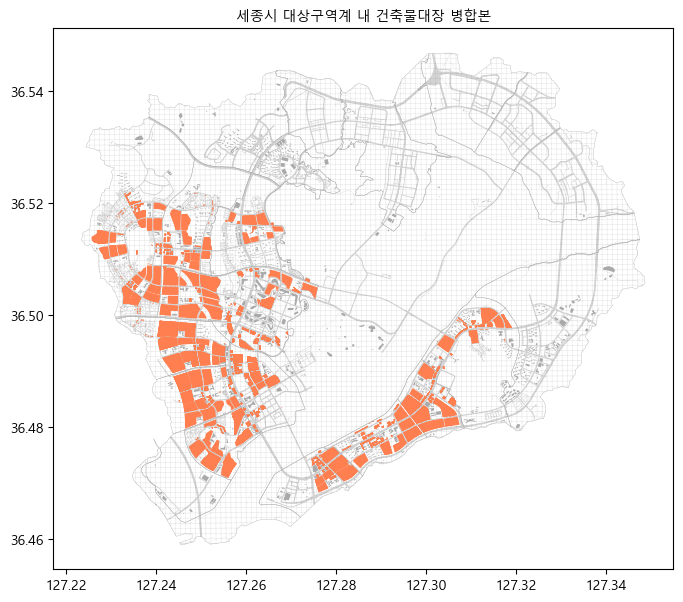

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# 세종시 경계(기존 읍면동 단위)
sejong_zone_adm_boundary.plot(ax=ax, facecolor='none', edgecolor='Darkgray', linewidth=0.2, zorder=3)
# 도로
rw_poly_clipped.plot(ax=ax, facecolor='lightgrey', zorder=1)
# 건물
building_clipped.plot(ax=ax, facecolor='darkgrey', zorder=2)
# 건축물 대장 병합 건물
bld_land.plot(ax=ax, color='coral', zorder=3)
# 격자
area_grid_intsc.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=0.1, linestyle='--', alpha=0.5)

ax.set_title('세종시 대상구역계 내 건축물대장 병합본', fontsize=10)
plt.show()

# 4. 파일 내보내기

In [ ]:
# csv파일로 저장
# building_merged.to_csv('00data/26.세종시_건축물대장_필터링_통합.csv', index=False)
# 건축물 대장 + shp 파일 병합파일 저장
# bld_land.to_file('00data/27.건축물대장+SHP.geojson', driver='GeoJSON')
# 대상구역 내에만 존재하는 상가 개폐업 정보 저장
# zone_sanga.to_file('00data/14.대상구역_상가개폐업정보.geojson', driver='GeoJSON')